[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mitchell-Mirano/Allison/blob/develop/examples/clustering/k-means.ipynb)

In [1]:
!pip install git+https://github.com/Mitchell-Mirano/Allison.git

zsh:1: command not found: pip


In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from allison.clustering import Kmeans

In [3]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['labels'] = data.Species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


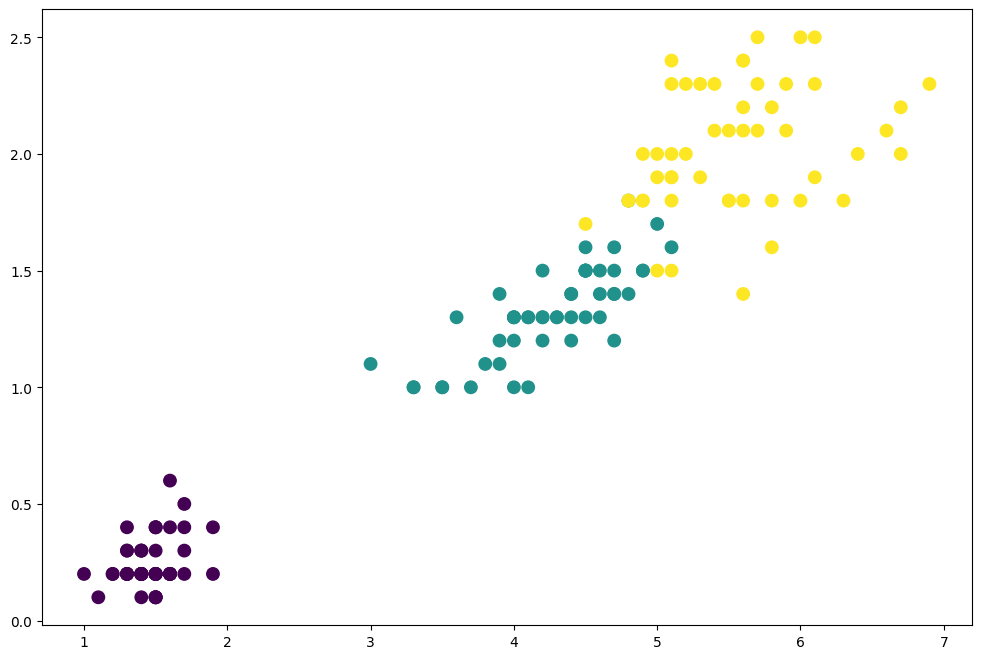

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=data['labels'])

In [6]:
X=data[['PetalLengthCm','PetalWidthCm','PetalLengthCm','PetalWidthCm']]
X

,PetalLengthCm,PetalWidthCm,PetalLengthCm,PetalWidthCm
0,1.4,0.2,1.4,0.2
1,1.4,0.2,1.4,0.2
2,1.3,0.2,1.3,0.2
3,1.5,0.2,1.5,0.2
4,1.4,0.2,1.4,0.2
...,...,...,...,...
145,5.2,2.3,5.2,2.3
146,5.0,1.9,5.0,1.9
147,5.2,2.0,5.2,2.0
148,5.4,2.3,5.4,2.3


In [7]:
model= Kmeans(n_centroids=3)
model.train(X,history_train=True)

Iter: 1 	 ==================================================> 	 moviment: 0.260
Iter: 2 	 ==================================================> 	 moviment: 0.049
Iter: 3 	 ==================================================> 	 moviment: 0.045
Iter: 4 	 ==================================================> 	 moviment: 0.110
Iter: 5 	 ==================================================> 	 moviment: 0.143
Iter: 6 	 ==================================================> 	 moviment: 0.425
Iter: 7 	 ==================================================> 	 moviment: 0.392
Iter: 8 	 ==================================================> 	 moviment: 0.258
Iter: 9 	 ==================================================> 	 moviment: 0.188
Iter: 10 	 ==================================================> 	 moviment: 0.097
Iter: 11 	 ==================================================> 	 moviment: 0.029
Iter: 12 	 ==================================================> 	 moviment: 0.043
Iter: 13 	 ==========================

In [8]:
model


        model: Kmeans 

        n_centroids: 3 

        

In [9]:
pred_labels = model.predict(X)

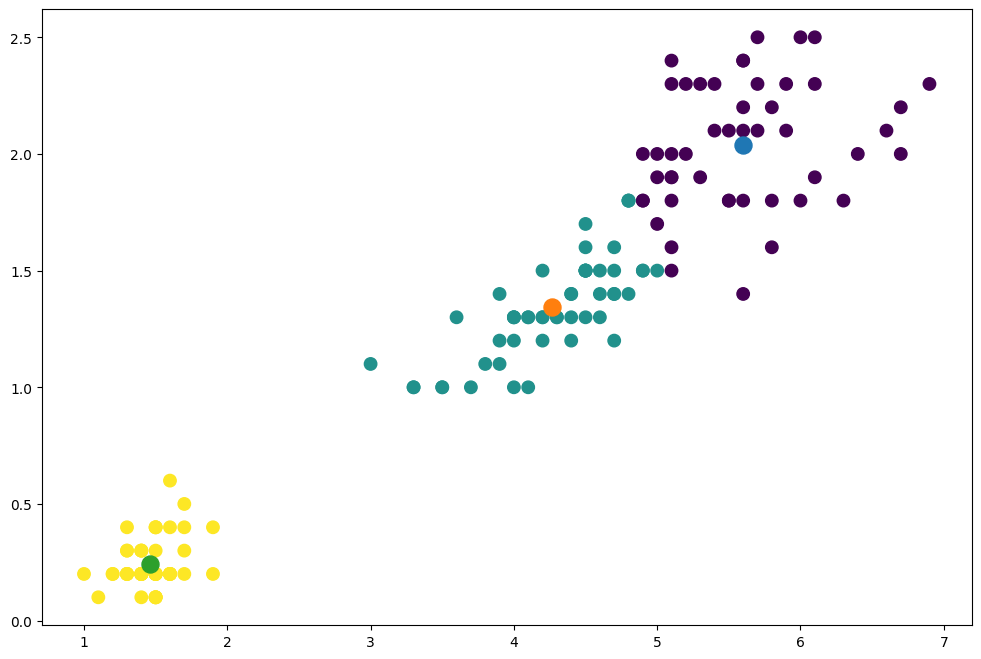

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],s=80, c=pred_labels)

for centroid in model.centroids:
    plt.scatter(centroid[0],centroid[1], s=150)

In [11]:
history=model.history_train
history

{0: array([[4.5, 1.6, 4.5, 1.6],
        [1.5, 0.3, 1.5, 0.3],
        [1.4, 0.2, 1.4, 0.2]]),
 1: array([[4.906     , 1.676     , 4.906     , 1.676     ],
        [1.5875    , 0.29583333, 1.5875    , 0.29583333],
        [1.35      , 0.19615385, 1.35      , 0.19615385]]),
 2: array([[4.92525253, 1.68181818, 4.92525253, 1.68181818],
        [1.65833333, 0.325     , 1.65833333, 0.325     ],
        [1.34814815, 0.2037037 , 1.34814815, 0.2037037 ]]),
 3: array([[4.92525253, 1.68181818, 4.92525253, 1.68181818],
        [1.71111111, 0.36666667, 1.71111111, 0.36666667],
        [1.37575758, 0.2030303 , 1.37575758, 0.2030303 ]]),
 4: array([[4.95876289, 1.69587629, 4.95876289, 1.69587629],
        [1.88947368, 0.43684211, 1.88947368, 0.43684211],
        [1.37941176, 0.20588235, 1.37941176, 0.20588235]]),
 5: array([[4.95876289, 1.69587629, 4.95876289, 1.69587629],
        [2.12727273, 0.55454545, 2.12727273, 0.55454545],
        [1.41428571, 0.21904762, 1.41428571, 0.21904762]]),
 6: array(

# Kmeans Animation

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.centroids = history[i]
    pred_labels = model.predict(X)
    ax.scatter(data['PetalLengthCm'], data['PetalWidthCm'], s=80, c=pred_labels)

    for centroid in model.centroids:
        ax.scatter(centroid[0], centroid[1], s=150)


plt.close()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(history), repeat=False)
# Display the animation
HTML(ani.to_jshtml())

In [13]:
model.get_distances(X)

array([[6.47787367, 4.36745969, 0.10983624],
       [6.47787367, 4.36745969, 0.10983624],
       [6.60766075, 4.49915508, 0.2401333 ],
       [6.34858361, 4.23639137, 0.080399  ],
       [6.47787367, 4.36745969, 0.10983624],
       [5.97644102, 3.87011383, 0.40007999],
       [6.42244869, 4.31714965, 0.12026637],
       [6.34858361, 4.23639137, 0.080399  ],
       [6.47787367, 4.36745969, 0.10983624],
       [6.40776981, 4.29231114, 0.20991427],
       [6.34858361, 4.23639137, 0.080399  ],
       [6.21982159, 4.10601017, 0.20214846],
       [6.53588917, 4.4217222 , 0.22285421],
       [6.9233552 , 4.81401123, 0.55359191],
       [6.73791614, 4.63142405, 0.37850231],
       [6.23814988, 4.13680622, 0.22641555],
       [6.50162907, 4.40551362, 0.32009998],
       [6.42244869, 4.31714965, 0.12026637],
       [6.03264844, 3.92105906, 0.34302187],
       [6.29201986, 4.1845058 , 0.09414882],
       [6.09162107, 3.97638369, 0.33950552],
       [6.23814988, 4.13680622, 0.22641555],
       [6.

In [14]:
inertias = []

for i in range(2,11):
    model = Kmeans(n_centroids=i)
    model.train(X, history_train=False)
    inertias.append(model.get_inertia(X))

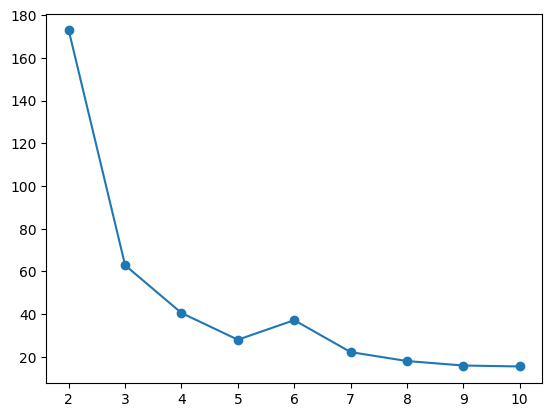

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(2,11), inertias, marker='o')